# Ecommerce Data Anlysis Using Python

![Python](https://docs.servicestack.net/img/pages/apps/jupyter-python.png)

## Analysis to Perform


### Here are some potential analyses we are going to perform:

1. Customer Analysis:
    - Identify the total number of customers city wise.
    - Identify the most frequent customers based on their order history.
2. Product Analysis:
    - Determine the total number of products available by category.
    - Analyze the distribution of products across sub-categories.
    - Identify products with low stock levels.
    - Calculate the average, maximum, and minimum prices for products.
3. Order Analysis:
    - Calculate the top 10 orders product wise.
    - Analyze the order status distribution (e.g., pending, delivered).
    - Identify the most popular products based on order quantity.
4. Sales Analysis:
    - Calculate total revenue generated from orders product wise.
    - Calculate the total revenue generated from all orders
    - Calculate total revenue product category wise percentage.
    - Analyze the performance of different product categories in terms of sales.
    - Identify the most profitable products based on the difference between original and selling prices.
5. Customer Order Patterns:
    - Identify product names with the highest and lowest order quantities.
    - Identify customers with the highest and lowest order quantities by customer name.
    - Determine the most preferred payment modes.
6. Time-based Analysis:
    - Month wise total sales.
    - Month and year wise total sales
    - Identify peak order date.
7. Geographical Analysis:
    - Explore the distribution of customers across different cities.
    - Analyze whether certain products or categories are more popular in a specific city.
8. Product Performance:
    - Identify the top 10 best-selling products.
    - Identify top 10 slow-moving products based on low sales.
9. Customer Retention:
    - Analyze repeat customers and their order patterns.
    - Calculate customer retention rates over time.
10. Payment Analysis:
    - Display successful and pending payments order count

## Intializing needed Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import mysql.connector

## Creating Connection To Ecommerce DataBase

In [2]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials
connection = mysql.connector.connect(
user='root',
password= 's123' ,
host='localhost',
database='ecommerce'
)
# Create a cursor object to execute SQL queries
cursor = connection. cursor()

## Checking DataBase and Creating DataFrame of its Tables Part

In [3]:

# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd. DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

#printing first 5 records from each table
print(customer_data.head())
print(product_data.head())
print(order_data.head())

#merge order data with product data based on product ID
merged_product_order_data = pd.merge (order_data, product_data, on='product_id')

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

## Data Analysis Part

### 1. Customer Analysis:

####    - Identify the total number of customers city wise.
    

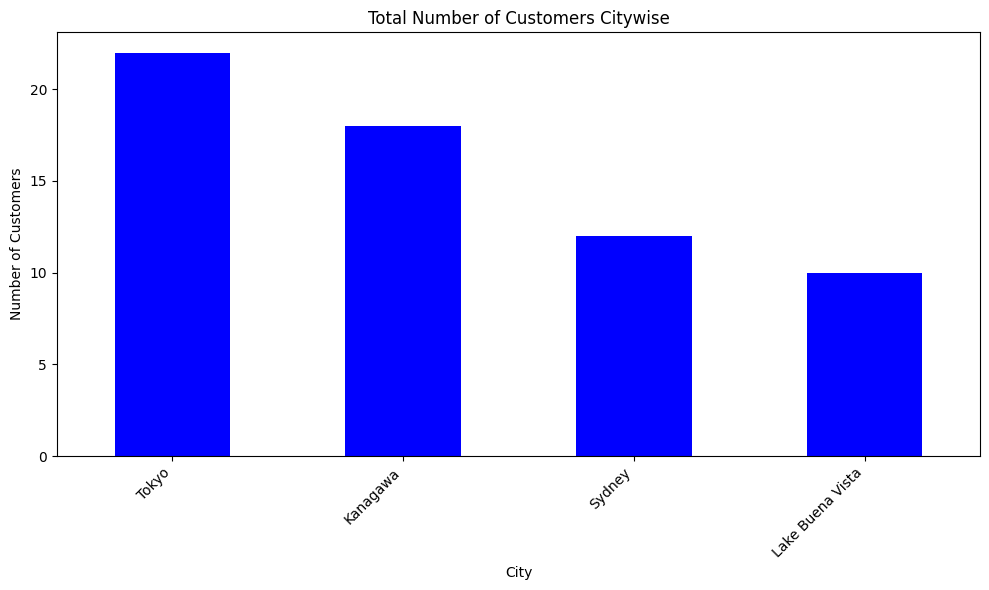

In [4]:
# City wise customer 
city_counts = customer_data['city' ]. value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='blue')
plt.title('Total Number of Customers Citywise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right') # Rotate city names for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt. show()


####    - Identify the most frequent customers based on their order history.

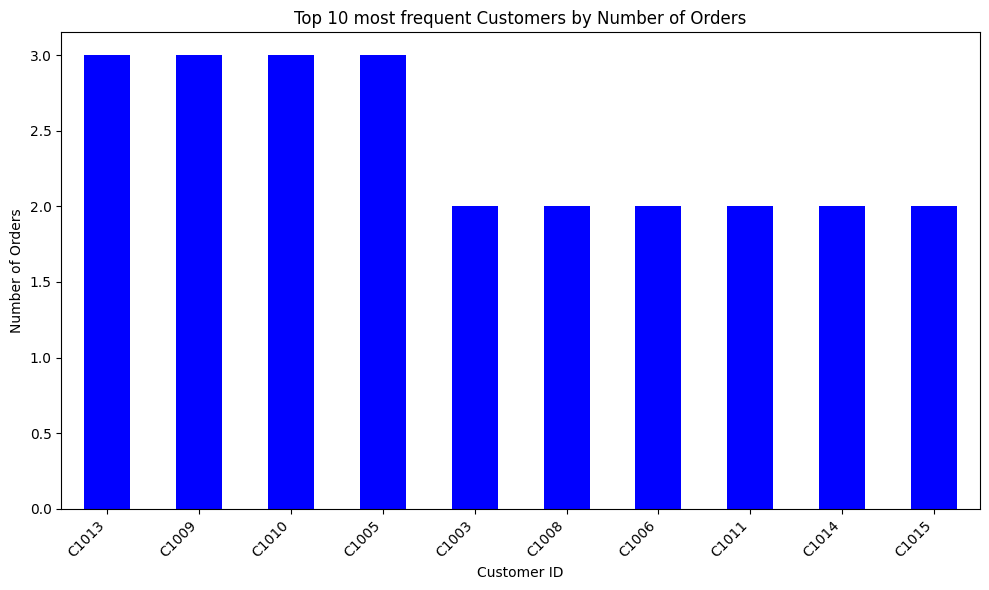

In [5]:
customer_order_counts = order_data['customer_id'].value_counts()
# Get the customer ID with the highest number of orders
top_10_customers = customer_order_counts.head(10)

# Plotting the bar graph for top 10 customers
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar', color='blue')
plt.title('Top 10 most frequent Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right') # Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()


### 2. Product Analysis:

####    - Determine the total number of products available by category.

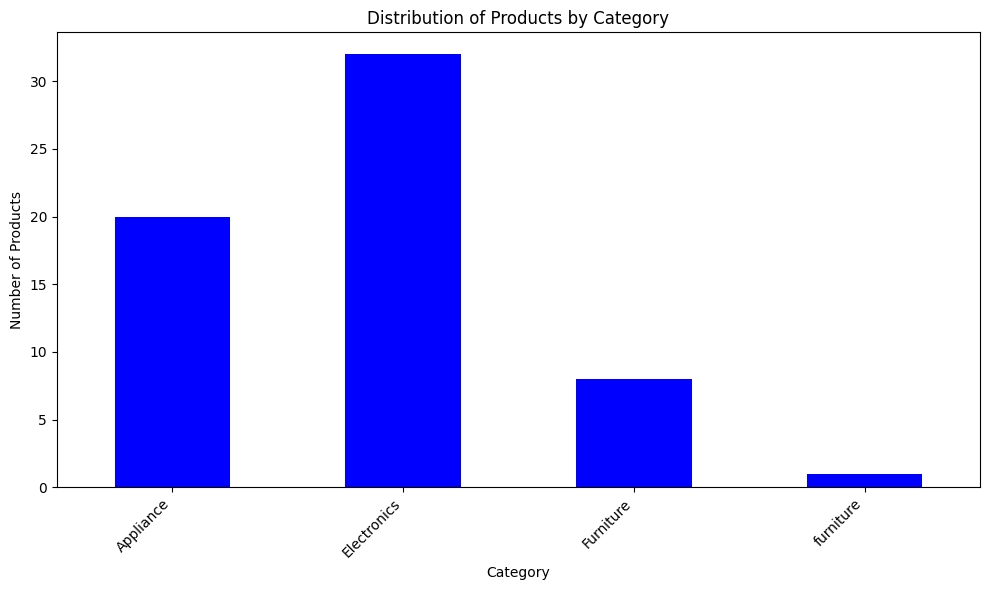

In [6]:
# total numbers of products in each category
category_counts = product_data.groupby('category').size()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right') # Rotate category names for better readability
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()



####    - Analyze the distribution of products across sub-categories.

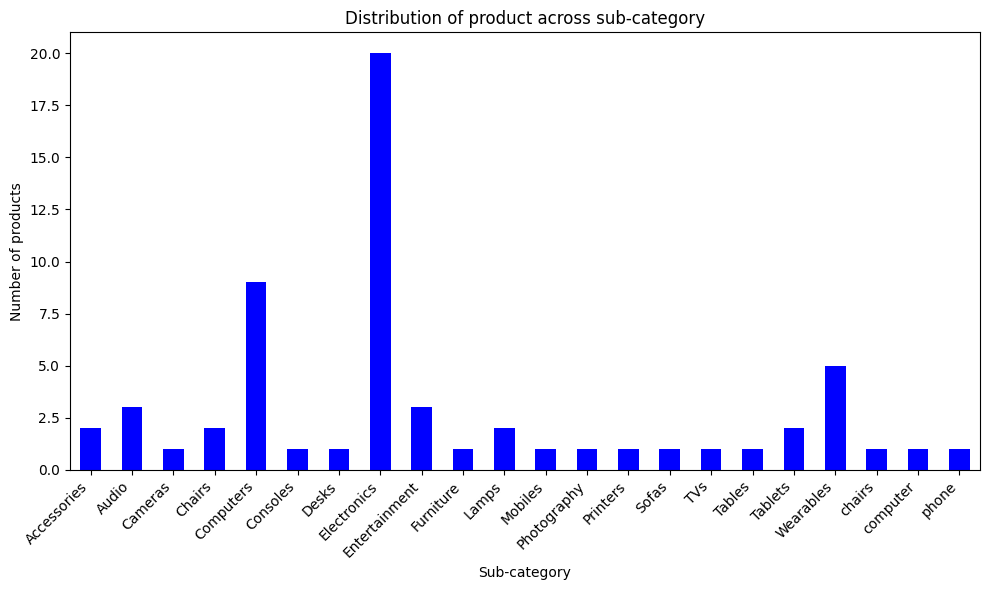

In [7]:
product_by_subcategory = product_data.groupby('sub_category').size()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
product_by_subcategory.plot(kind='bar',color='blue')
plt.title('Distribution of product across sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Number of products')
plt.xticks(rotation=45, ha='right') # Rotate city names for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt. show()


####    - Identify products with low stock levels.

   product_id    product_name     category sub_category  original_price  \
0        P102           Chair    furniture       Chairs        20000.00   
46       P148          Tablet  Electronics    Computers        30000.00   
39       P141         Printer  Electronics    Computers        12000.00   
10       P112           chair    Furniture       chairs         1000.00   
30       P132        Sofa Set    Furniture    Furniture        50000.00   
..        ...             ...          ...          ...             ...   
17       P119       Desk Lamp    Furniture        Lamps         3000.00   
1        P103          Laptop  Electronics     computer        60000.00   
23       P125      Smartwatch  Electronics    Wearables        15000.00   
4        P106       Laptop HP  Electronics    Computers        67200.00   
5        P107  Samsung Galaxy  Electronics      Mobiles        60000.99   

    selling_price  stock  
0        15000.00     10  
46       25000.00     10  
39       10000.00 

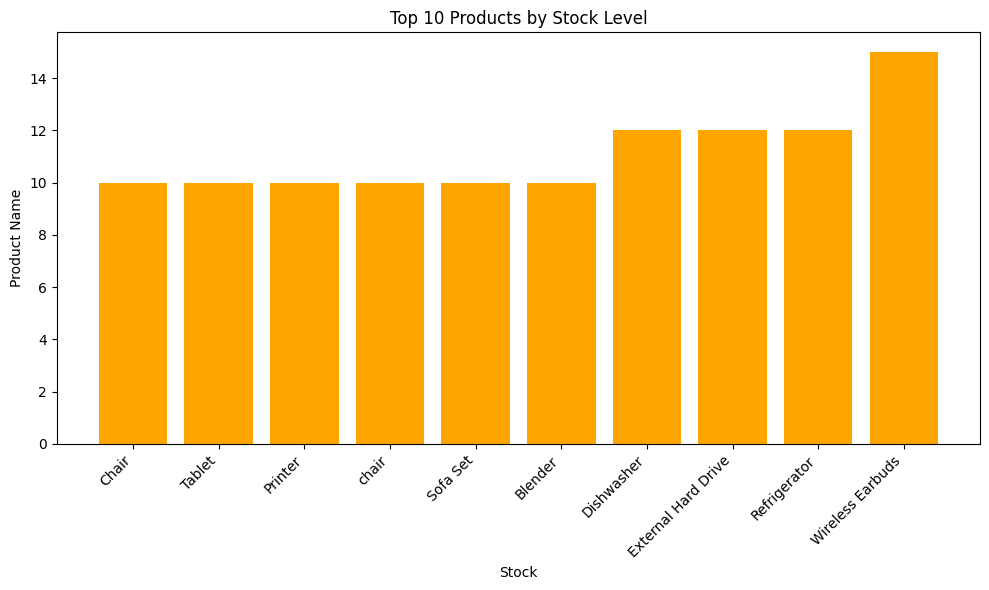

In [8]:
sorted_products = product_data.sort_values(by='stock', ascending=True)
print(sorted_products)
top_10_products = sorted_products.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_name'], top_10_products['stock'], color='orange')
plt.xlabel('Stock')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Stock Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


####    - Calculate the average, maximum, and minimum prices for products.

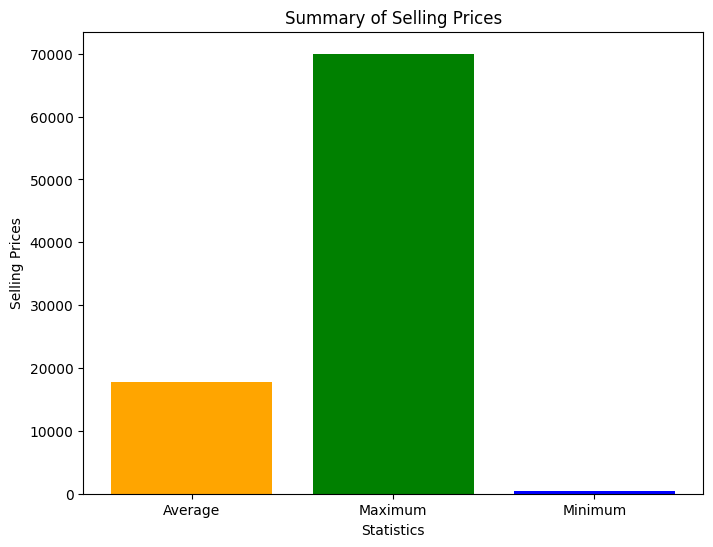

In [9]:

# calculate the average, maximum, and minimum selling prices for products
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()

# create a bar plot
plt.figure(figsize=(8,6))
plt.bar(['Average','Maximum','Minimum'], [average_selling_price, maximum_selling_price, minimum_selling_price], color=['orange','green','blue'])
plt.title('Summary of Selling Prices')
plt.xlabel('Statistics')
plt.ylabel('Selling Prices')
plt.show()


### 3. Order Analysis:

####    - Calculate the top 10 orders product wise.

Top 10 products with highest number of orders:


product_name
Tablet             4
Smartwatch         3
Vacuum Cleaner     3
Gaming Console     2
Digital Camera     2
Coffee Maker       2
Fitness Tracker    2
Microwave Oven     2
Printer            2
Desk Lamp          2
Name: count, dtype: int64

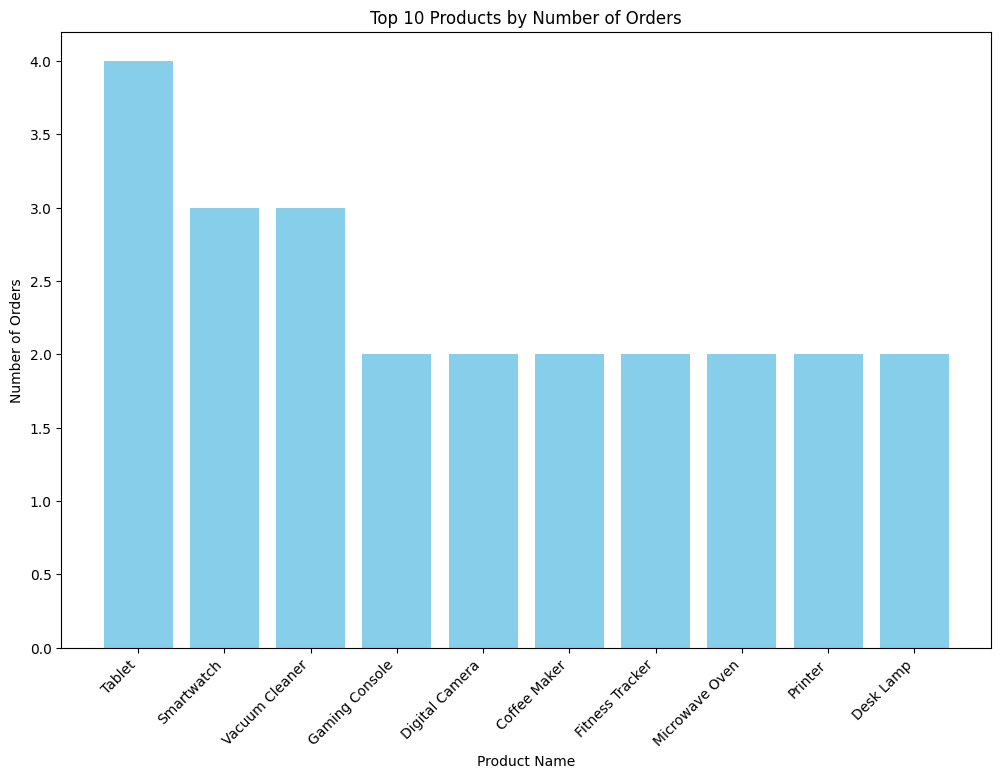

In [10]:
# Calculate the top 10 orders product wise.
top_10_orders = product_data['product_name'].value_counts().head(10)
print("Top 10 products with highest number of orders:")
display(top_10_orders)

# plotting the bar  chart for the top 10 products.
plt.figure(figsize=(12,8))
plt.bar(top_10_orders.index, top_10_orders.values , color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.title('Top 10 Products by Number of Orders')
plt.xticks(rotation=45, ha='right') # Rotate city names for better readability
plt.show()


####    - Analyze the order status distribution (e.g., pending, delivered).

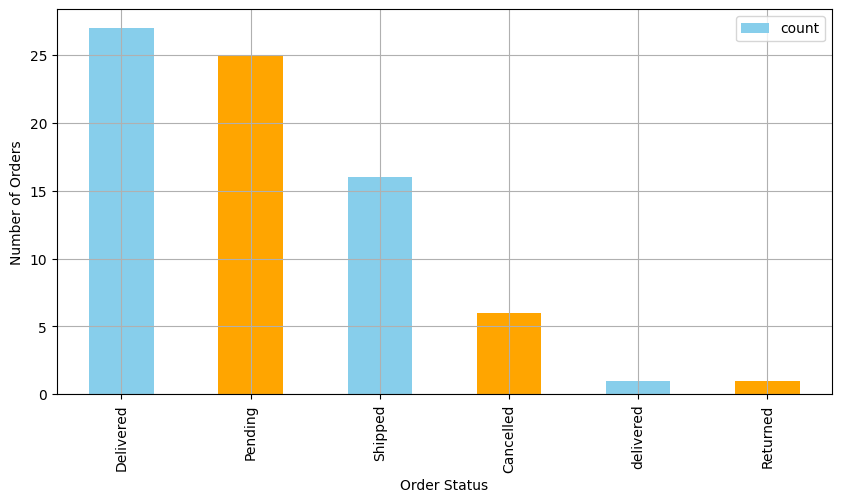

In [11]:
# Analyze the order status distribution (e.g., pending, delivered).
order_status_counts = order_data['order_status'].value_counts()

# creating bar  plot for visual representation of data
plt.figure(figsize=(10,5))
order_status_counts.plot(kind='bar', color=['skyblue','orange'])
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.legend()
plt.show()


####    - Identify the most popular products based on order quantity.

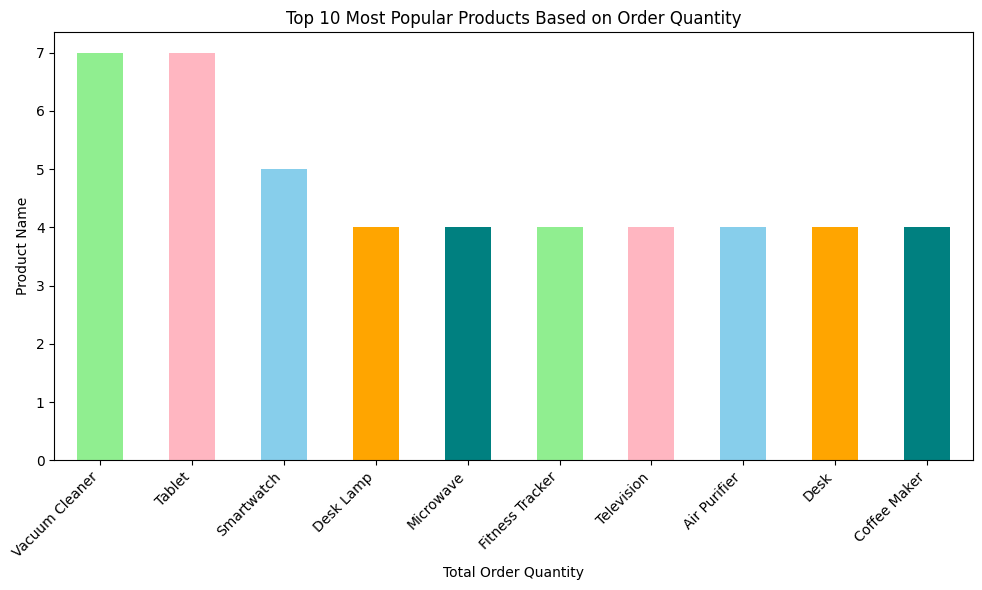

In [12]:
# Identify the most popular products based on order quantity

#merge order data with product data based on product ID
merged_product_order_data = pd.merge (order_data, product_data, on='product_id')

#group merged data by product name and sum the quantites
product_quantity= merged_product_order_data.groupby('product_name')['quantity'].sum()

#sort products based on total quantity sold
top_products=product_quantity.sort_values(ascending=False).head(10)
# Plotting the horizontal bar graph 
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar',color=['lightgreen','lightpink','skyblue','orange','teal'])
plt.title('Top 10 Most Popular Products Based on Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.xticks(rotation=45, ha='right') # Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()


### 4. Sales Analysis:

####    - Calculate total revenue generated from orders product wise.

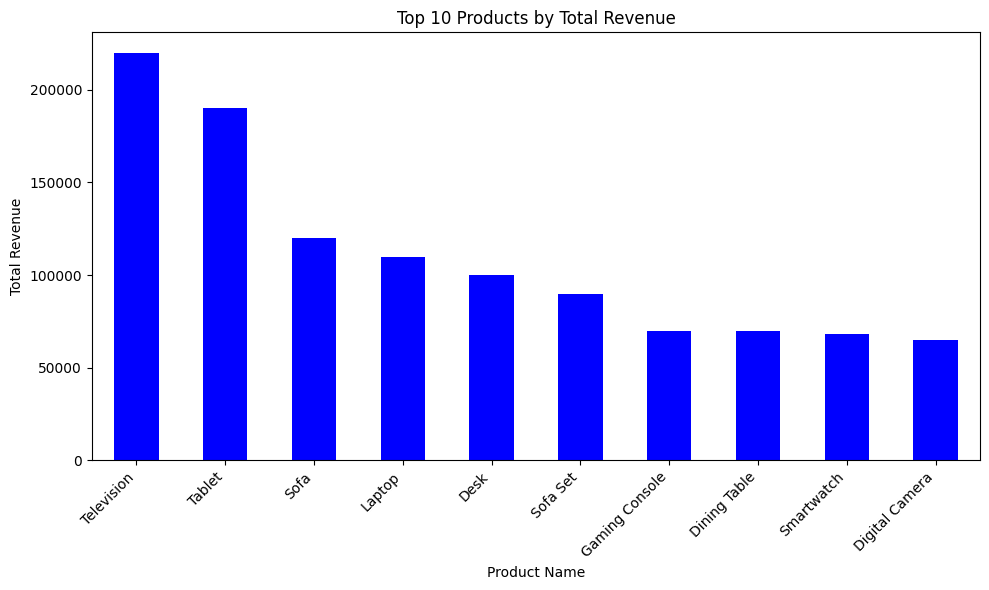

In [13]:
#Calculate total revenue generated from orders product wise.

#merge order data with product data based on product ID
merged_data = pd.merge (order_data, product_data, on='product_id')

#Calculate revenue for each order 
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

#Group merged data by product name and sum the revenues 
product_revenue =merged_data.groupby('product_name') ['revenue'].sum()

#Sort products based on total revenue generated
top_products_revenue = product_revenue.sort_values(ascending=False).head (10)

#Create a bar plot
plt.figure(figsize=(10, 6))
top_products_revenue.plot(kind='bar', color='blue') 
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue') 
plt.xticks (rotation=45, ha='right')# Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()


####    - Calculate the total revenue generated from all orders


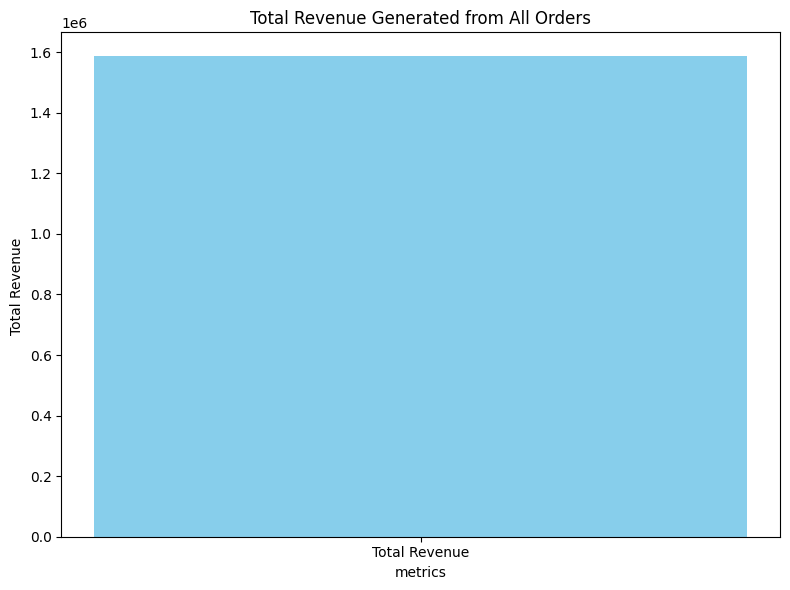

In [14]:
#Calculate the total revenue generated from all orders

#Calculate total revenue generated from all orders
total_revenue_all_orders = order_data['total_price'].sum()

#plotting Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue_all_orders], color='skyblue')
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Total Revenue ')
plt.xlabel('metrics')
plt.tight_layout()
plt.show()




####    - Calculate total revenue product category wise percentage.

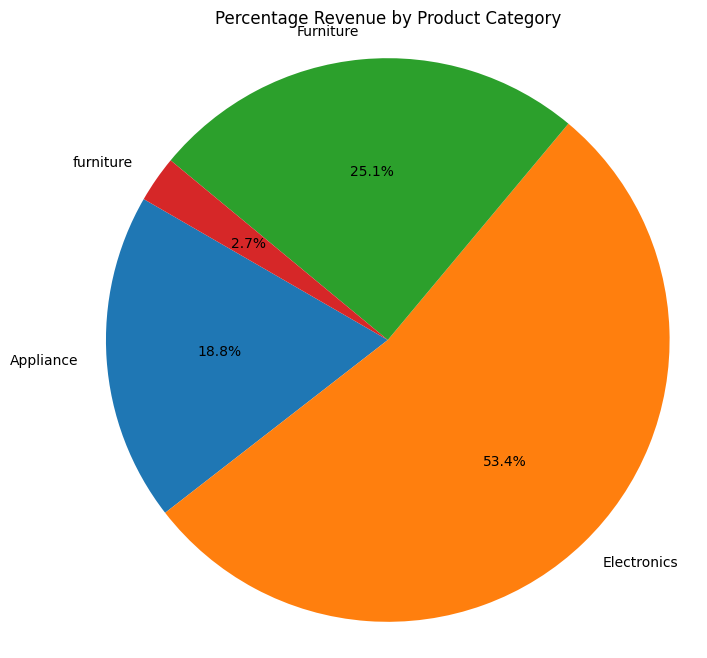

In [15]:
# Calculate total revenue product category wise percentage.

# Merge the category column from product_data into merged_data
merged_data_new = pd.merge(merged_data , product_data[['product_id','category']], on='product_id')

# Group merged data by product category and sum the revenues
category_revenue = merged_data.groupby('category')['revenue'].sum()

# Calculate total revenue across all categories
total_revenue = category_revenue.sum()

# Calculate percentage revenue for each category
category_revenue_percentage = (category_revenue / total_revenue) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', startangle=150)
plt.title('Percentage Revenue by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


####    - Analyze the performance of different product categories in terms of sales.

####    - Identify the most profitable products based on the difference between original and selling prices.

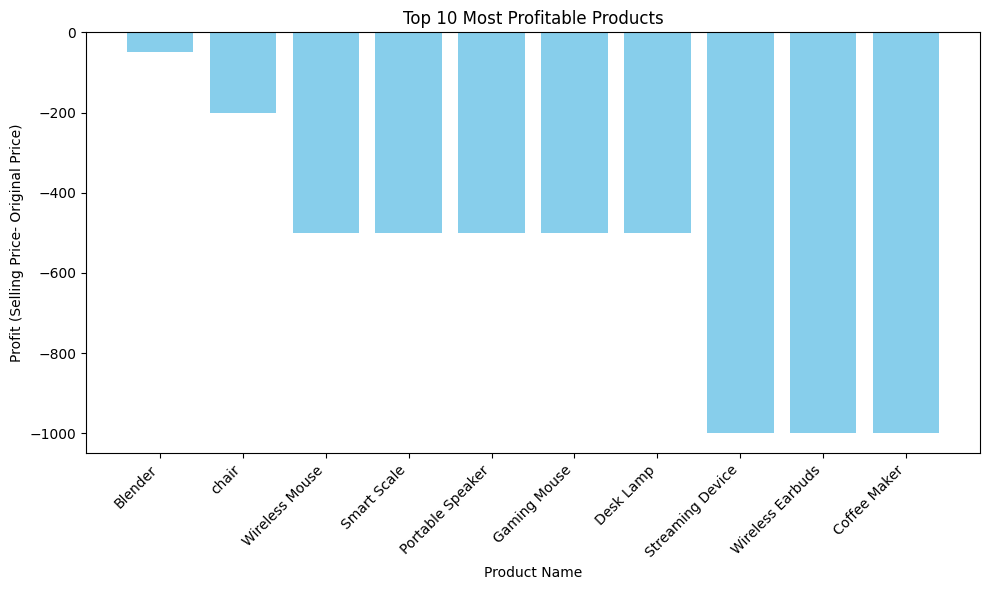

In [16]:

#Identify the most profitable products based on the difference between original and selling prices.

# Calculate the profit for each product 
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

#Sort products based on profit 
most_profitable_products= product_data.sort_values(by='profit', ascending=False).head(10)

# Create a bar chart to visualize the most profitable products
plt.figure(figsize=(10, 6)) 
plt.bar(most_profitable_products['product_name'], most_profitable_products['profit'], color='skyblue') 
plt.title('Top 10 Most Profitable Products') 
plt.xlabel('Product Name')
plt.ylabel('Profit (Selling Price- Original Price)')
plt.xticks (rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 5. Customer Order Patterns:


#### - Identify product names with the highest and lowest order quantities.


Product with the highest order quantity: Tablet
Highest order quantity: 7.0
Product with the lowest order quantity: Dishwasher
Lowest order quantity: 1.0


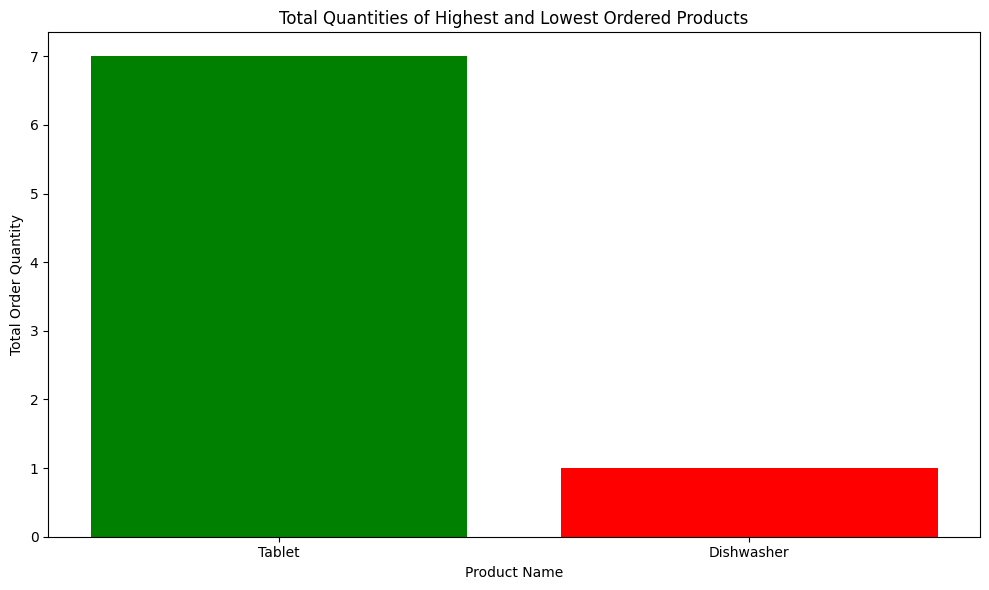

In [17]:
#Identify product names with the highest and lowest order quantities.

#merged order data with product data
merged_data=pd.merge(order_data,product_data,on ='product_id')

#group merged data by customer name and sum the quantites
product_quantity_sold= merged_data.groupby('product_name')['quantity'].sum()

#Identify product with the highest order quantity
highest_quantity_product = product_quantity_sold.idxmax()
highest_quantity= product_quantity_sold.max()

#Identify product with the Lowest order quantity
lowest_quantity_product= product_quantity_sold.idxmin()
lowest_quantity = product_quantity_sold.min()

print("Product with the highest order quantity:", highest_quantity_product) 
print("Highest order quantity:", highest_quantity)
print("Product with the lowest order quantity:", lowest_quantity_product)
print("Lowest order quantity:", lowest_quantity)

#Create a bar plot for highest and Lowest order quantities
plt.figure(figsize=(10, 6))
plt.bar([highest_quantity_product, lowest_quantity_product], [highest_quantity, lowest_quantity], color=['green', 'red']) 
plt.title('Total Quantities of Highest and Lowest Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.tight_layout()
plt.show()

#### - Identify customers with the highest and lowest order quantities by customer name.


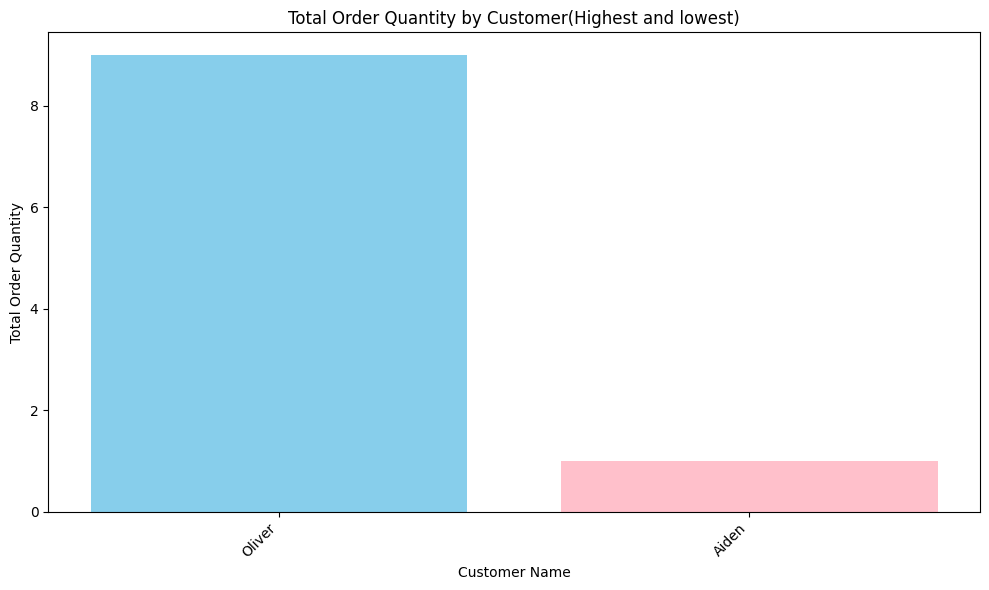

In [18]:
#Identify customers with the highest and lowest order quantities by customer name.

# Merge order_data with customer_data on 'customer_id' 
merged_data = pd.merge(order_data, customer_data, on='customer_id')

#Group merged data by customer name and sum the quantities 
customer_quantity_sold = merged_data.groupby('name') ['quantity'].sum()

#Identify customer with the highest order quantity 
highest_quantity_customer= customer_quantity_sold.idxmax() 
highest_quantity = customer_quantity_sold.max()

#Identify customer with the lowest order quantity 
lowest_quantity_customer =customer_quantity_sold.idxmin() 
lowest_quantity = customer_quantity_sold.min()

#Create a bar plot for highest and Lowest order quantities by customer 
plt.figure(figsize=(10, 6))
plt.bar([highest_quantity_customer, lowest_quantity_customer], [highest_quantity, lowest_quantity], color=['skyblue', 'pink']) 
plt.title('Total Order Quantity by Customer(Highest and lowest)') 
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.xticks (rotation=45,ha='right')
plt.tight_layout() 
plt.show()


#### - Determine the most preferred payment modes.

Most preferred payment mode: Online


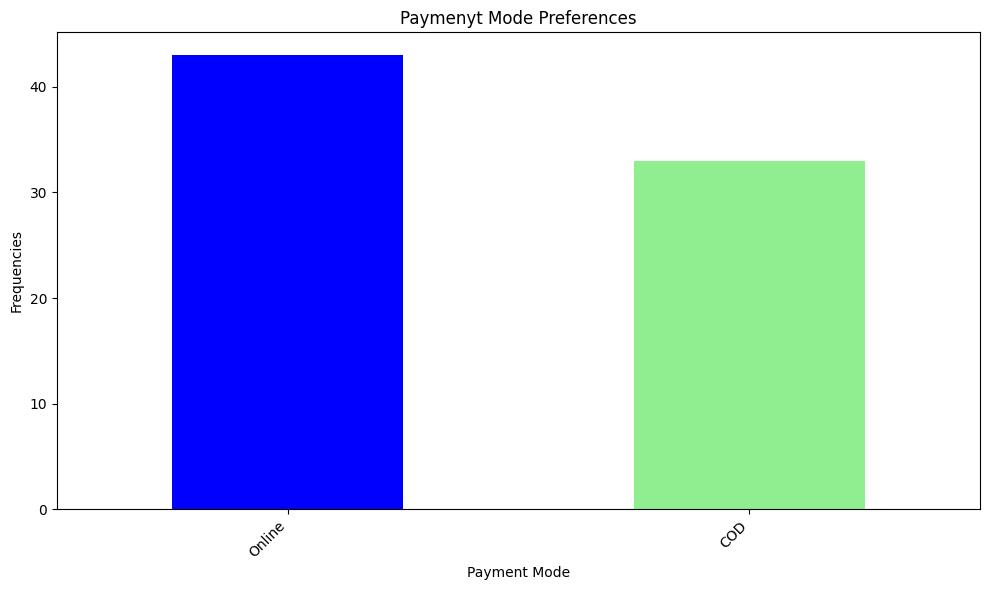

Most preferred payment mode: Online


In [19]:
#Determine the most preferred payment modes.

# Group orders by payment mode and count the number of orders for each mode 
payment_mode_counts = order_data['payment_mode'].value_counts()

#Print the most preferred payment mode
most_preferred_payment_mode =payment_mode_counts.idxmax()
print("Most preferred payment mode:", most_preferred_payment_mode)

# Create a bar plot to visualize the distribution of payment modes 
plt.figure(figsize=(10, 6))
payment_mode_counts.plot(kind='bar', color=['blue','lightgreen']) 
plt.title('Paymenyt Mode Preferences')
plt.xlabel('Payment Mode')
plt.ylabel('Frequencies')
plt.xticks (rotation=45,ha='right')
plt.tight_layout()
plt.show()

#Print the most preferred payment mode
most_preferred_payment_mode =payment_mode_counts.idxmax()
print("Most preferred payment mode:", most_preferred_payment_mode)


### 6. Time-based Analysis:

#### - Month wise total sales.

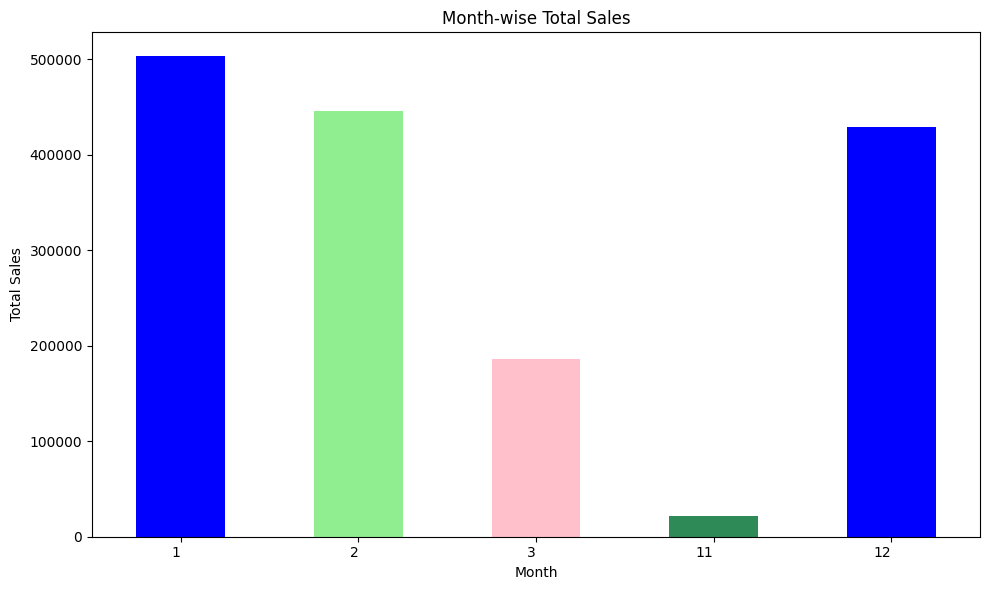

In [20]:
# Month wise total sales.

# Convert order date to datetime 
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

#Extract month from order_date 
order_data['order_month'] = order_data['order_date'].dt.month

#Group orders by month and calculate total sales for each month 
monthly_sales= order_data.groupby('order_month') ['total_price'].sum()

#Create a bar plot to visualize month-wise total sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color=['blue','lightgreen','pink','seagreen'])
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales') 
plt.xticks (rotation=0,ha='right')
plt.tight_layout()
plt.show()


#### - Month and year wise total sales


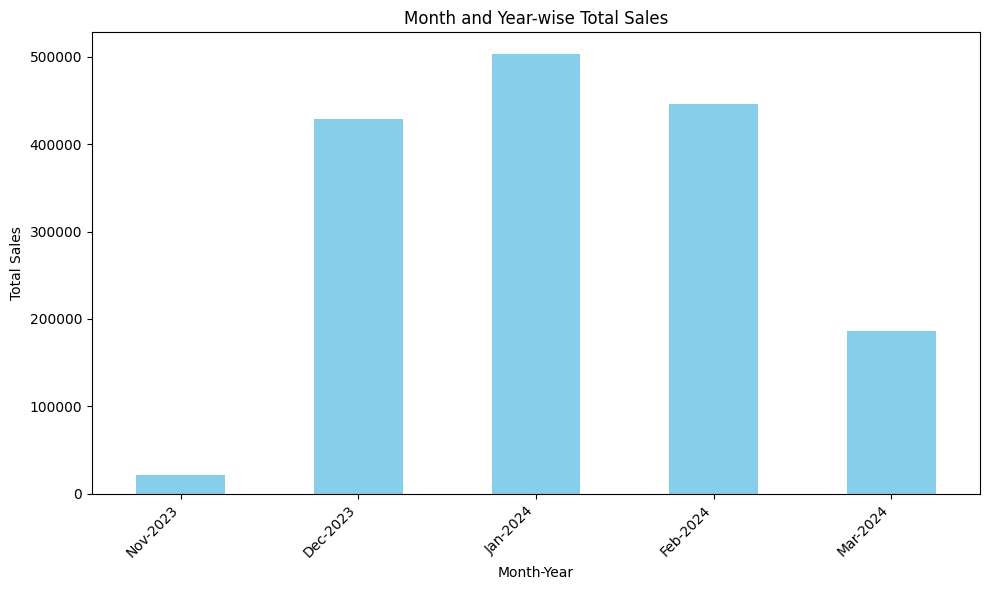

In [21]:
# Month and Year-wise Total Sales

# Convert order date to datetime
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract month and year from order_date
order_data['order_month'] = order_data['order_date'].dt.month
order_data['order_year'] = order_data['order_date'].dt.year

# Group orders by month and year and calculate total sales for each combination
monthly_sales = order_data.groupby(['order_year', 'order_month'])['total_price'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')

# Set x-axis Labels to month and year combinations
labels = [f"{calendar.month_abbr[month]}-{year}" for year, month in monthly_sales.index]
plt.xticks(range(len(monthly_sales)), labels, rotation=45, ha='right')
plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


#### - Identify peak order date.

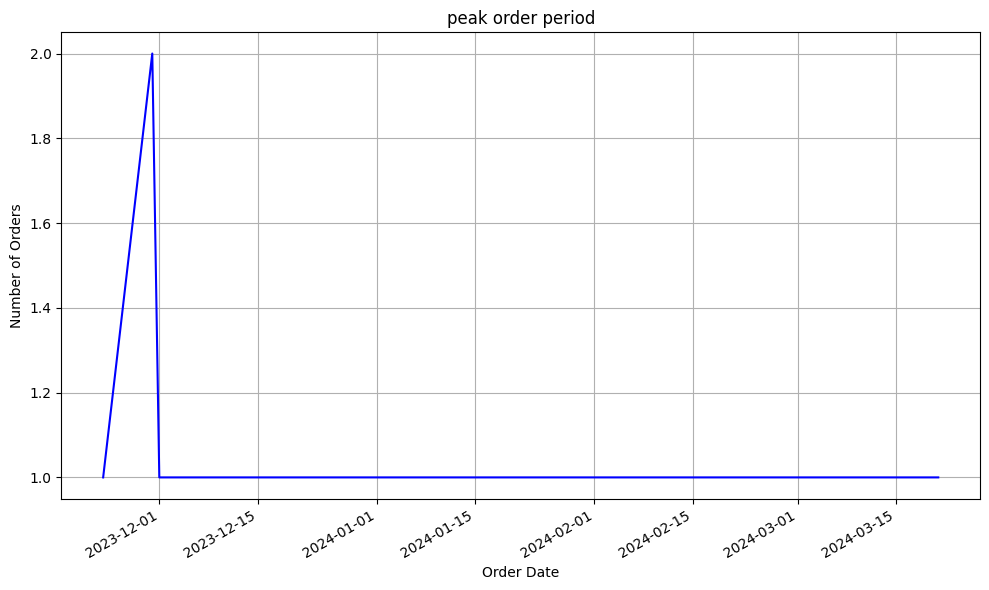

In [22]:
#Identify peak order date.

# Convert order date to datetime if it's not already in datetime format 
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

#Group orders by order date and count the number of orders for each date
daily_orders =order_data.groupby('order_date').size()

#Plot the peak order date
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='line', color='blue')
plt.title('peak order period')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


### 7. Geographical Analysis:

#### - Explore the distribution of customers across different cities.

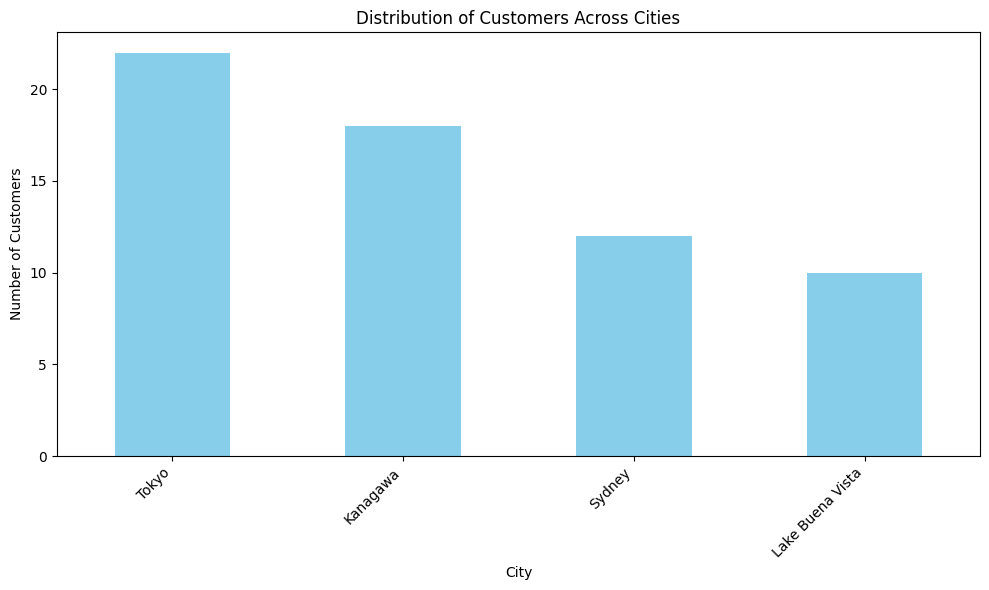

In [23]:
#  Explore the distribution of customers across different cities.

city_distribution = customer_data["city"].value_counts()

# Plot the distribution of customers across different cities
plt.figure(figsize=(10, 6))
city_distribution.plot(kind="bar", color="skyblue")
plt.title('Distribution of Customers Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


#### - Analyze whether certain products or categories are more popular in a specific city.

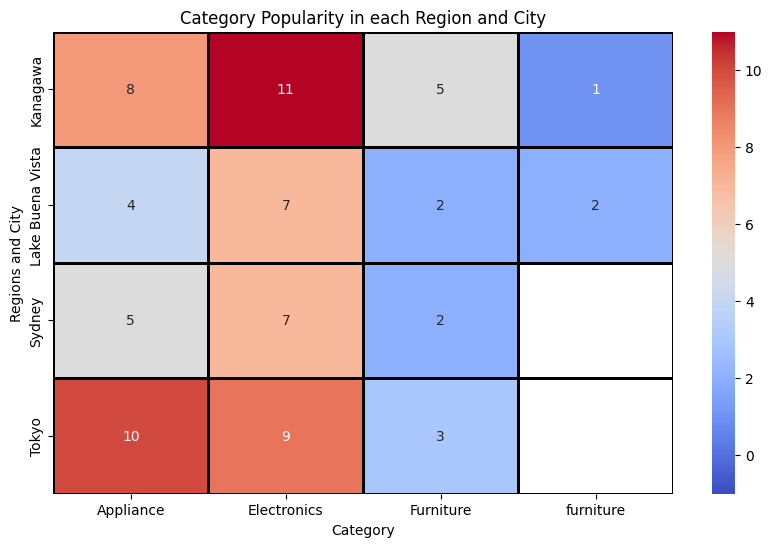

In [24]:
# Analyze whether certain products or categories are more popular in a specific city.

#heatmap 
#merged order data with product data
merged_data=pd.merge(order_data,product_data,on ='product_id')
#merged order data with product data
merged_data =pd.merge(merged_data,customer_data, on ='customer_id')

# Exclude non-numeric columns from correlation calculation
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data_numeric = merged_data[numeric_columns]

# Aggregate the data
agg_data = merged_data.groupby(['city', 'category']).size().reset_index(name='order_count')

# Create a pivot table for the heatmap
pivot_table = agg_data.pivot(index='city', columns='category', values='order_count')


plt.figure(figsize=(10,6))
heatmap=sns.heatmap(pivot_table, annot=True, fmt=".0f", vmin=-1, vmax=11, center=5, cmap="coolwarm", linewidths=1,linecolor="Black")
heatmap.set_title("Category Popularity in each Region and City")
heatmap.set_xlabel('Category')
heatmap.set_ylabel('Regions and City')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=0)
plt.show()


### 8. Product Performance:

#### - Identify the top 10 best-selling products.

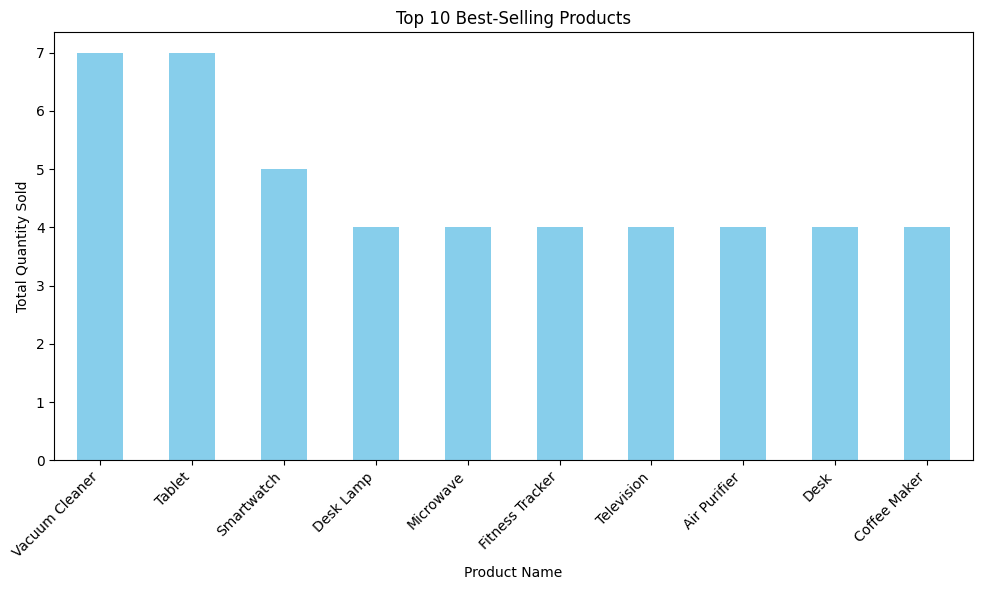

In [25]:
# Identify the best-selling products.

# Merge order details data with product data to get product names
merged_data = pd.merge(order_data, product_data[['product_id', 'product_name']], on='product_id')

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby("product_name")['quantity'].sum()

# Sort products based on total quantity sold
top_products = product_quantity_sold.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')

plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### - Identify top 10 slow-moving products based on low sales.

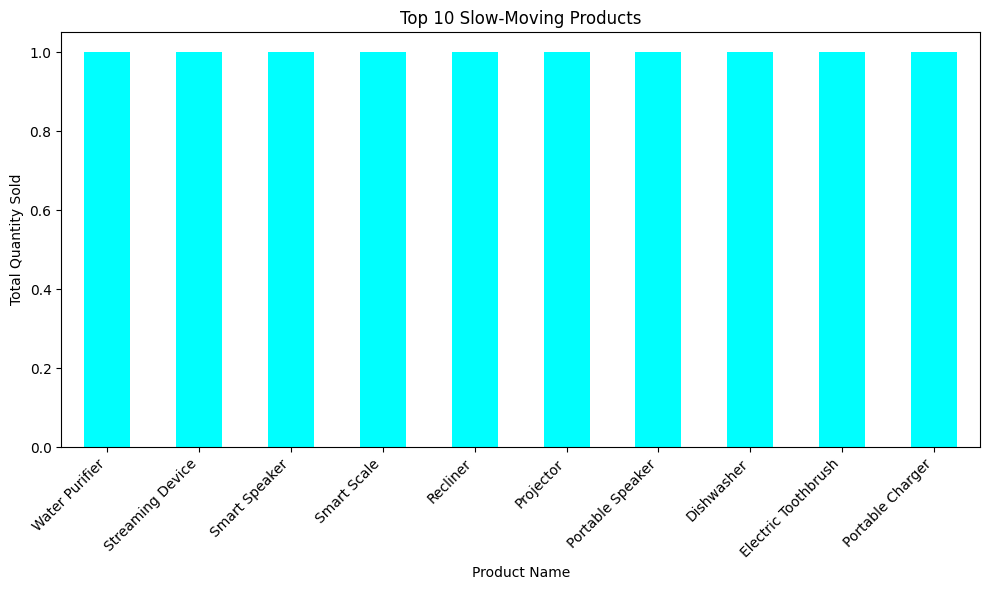

In [26]:
# Identify top 10 slow-moving products based on low sales.

# Merge order detalls data with product data to get product names
merged_data = pd.merge(order_data, product_data[["product_id", 'product_name']], on="product_id")

# Group merged data by product name and sue the quantities
product_quantity_sold = merged_data.groupby('product_name')["quantity"].sum()

#Sort products based on total quantity sold in ascending order
slowest_products = product_quantity_sold.sort_values().head(10)

#Create a bar plat
plt.figure(figsize=(10, 6))

slowest_products.plot(kind="bar", color='cyan')                                                         

plt.title('Top 10 Slow-Moving Products')
plt.xlabel('Product Name')

plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()



#### 9. Customer Retention:

#### - Analyze repeat customers and their order patterns.

#### - Calculate customer retention rates over time.

### 10. Payment Analysis:

#### - Display successful and pending payments order count.

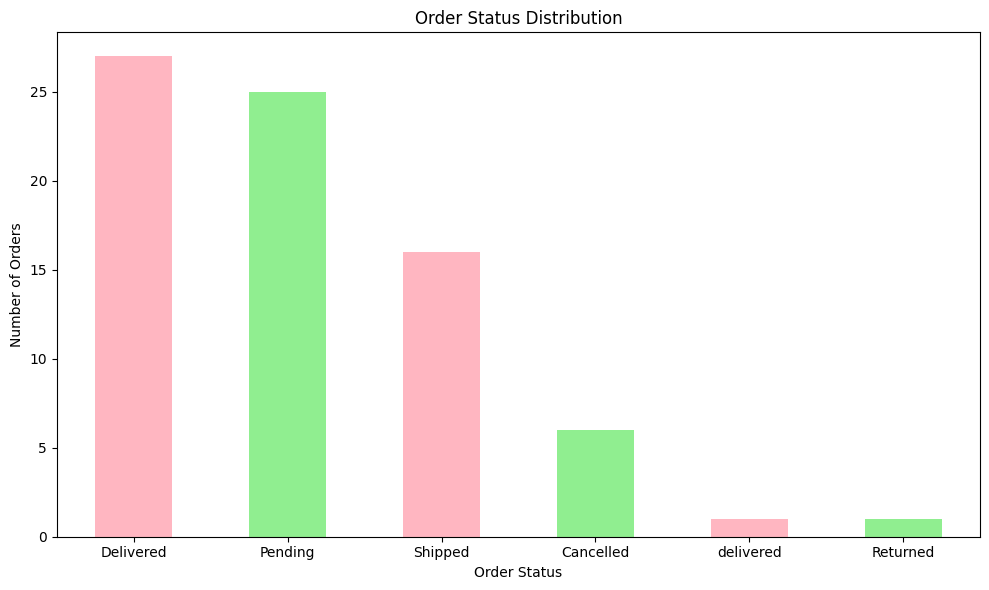

In [27]:
#Group orders by order status and count the occurrences
order_status_counts = order_data['order_status'].value_counts()

#Create a bar plot
plt.figure(figsize=(10, 6))
order_status_counts.plot(kind='bar', color=['lightpink', 'lightgreen'])
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks (rotation=0)
plt.tight_layout()
plt.show()